In [1]:
import os
import sys
import numpy as np
import seaborn as sns
from IPython.display import display
from PIL import Image
from tqdm.notebook import tqdm

sns.reset_orig()
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('..')

In [2]:
from catalogue import get_catalogue

outdir = 'output/prior_test_3'
catalogue = get_catalogue(outdir=outdir)

In [3]:
jname = "J0653+8051"

from models import get_models
model_name = "simple_power_law"
spl = {
    'uniform_1': get_models(model_name, custom_p_b=(1e-3, 1e4, 'uniform')),
    'uniform_2': get_models(model_name, custom_p_b=(1e-2, 1e3, 'uniform')),
    'uniform_3': get_models(model_name, custom_p_b=(1e-2, 1e3, 'log_uniform')),
    'uniform_4': get_models(model_name, custom_p_b=(0.5, 10, 'uniform'))
}

In [4]:
from fit import fit
from env import fit_only_env
import multiprocessing

pbar = tqdm(total=len(spl.keys()))
with multiprocessing.Pool(processes=len(spl.keys())) as pool:
    for k, v in spl.items():
        pool.apply_async(fit, args=(jname, model_name, fit_only_env(f'{outdir}/{k}', v, catalogue, gaussian=True)), callback=lambda _: pbar.update(1))
    pool.close()
    pool.join()
print('Done')

  0%|          | 0/4 [00:00<?, ?it/s]

Done


In [5]:
def get_plots(labels: list):
    plots = []
    corner_plots = []
    for i, label in enumerate(labels):
        plot_path = f'{outdir}/{label}/{jname}/{model_name}_result.png'
        corner_plot_path = f'{outdir}/{label}/{jname}/{model_name}_corner.png'
        if not os.path.exists(plot_path) or not os.path.exists(corner_plot_path):
            print(f'Plot {plot_path} not found')
            continue
        plots.append(Image.open(plot_path))
        corner_plots.append(Image.open(corner_plot_path))
    if len(plots) > 0:
        plots_img = Image.fromarray(np.hstack([np.array(image) for image in plots]))
        corner_plots_img = Image.fromarray(np.hstack([np.array(image) for image in corner_plots]))
        display(plots_img)
        display(corner_plots_img)
    else:
        print('No plots found')

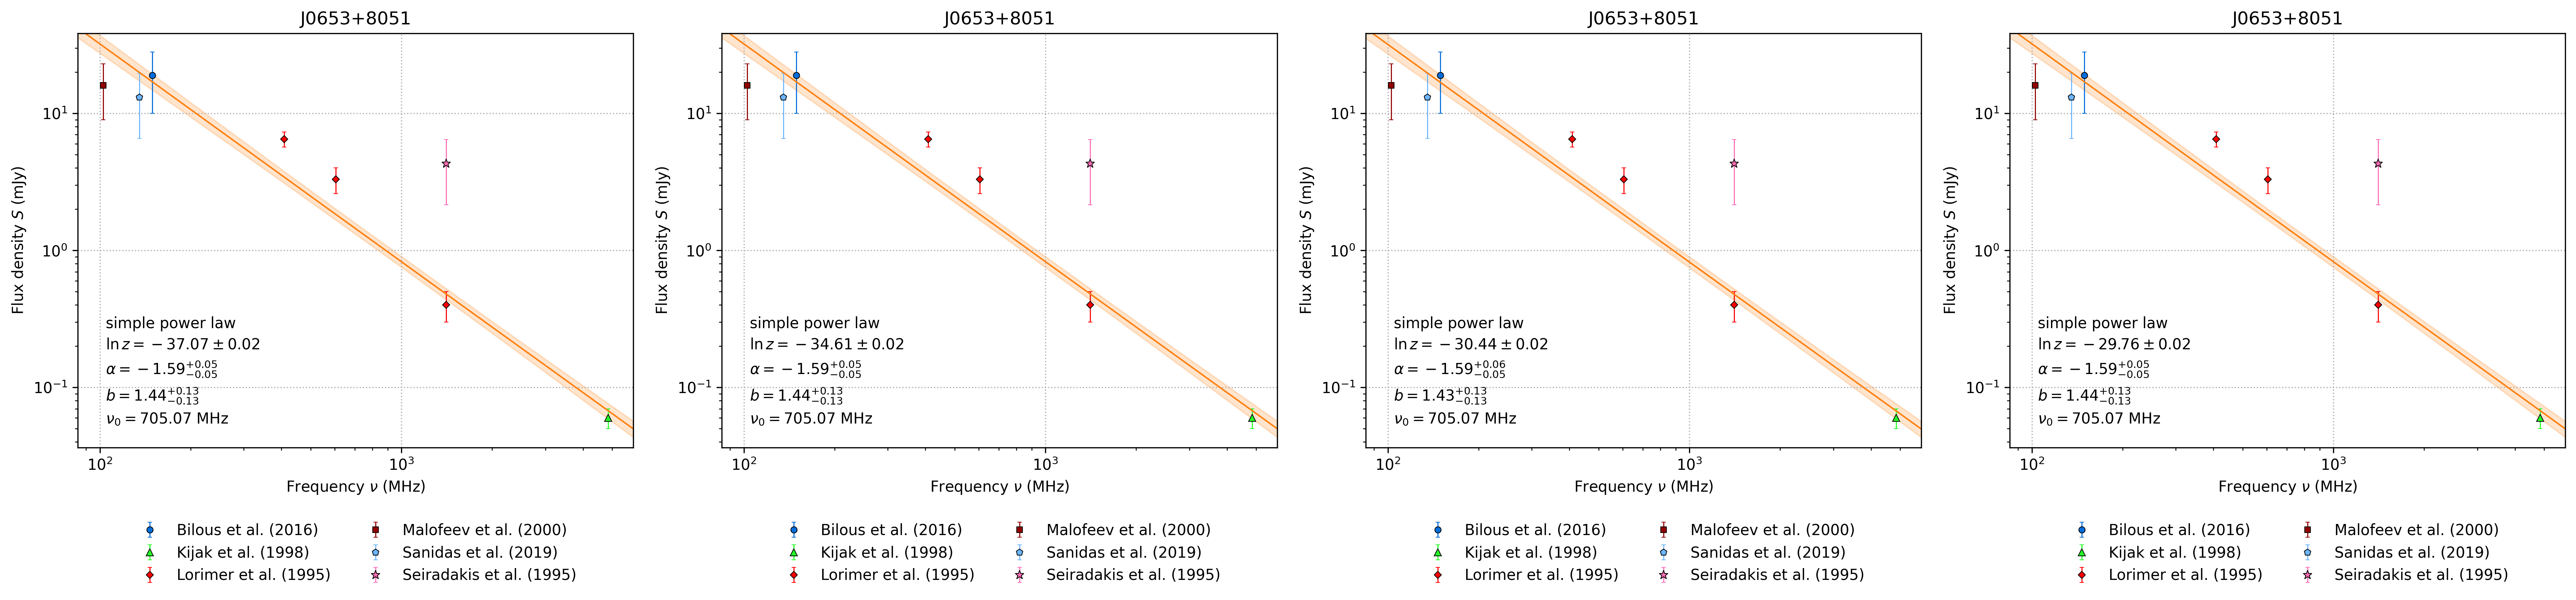

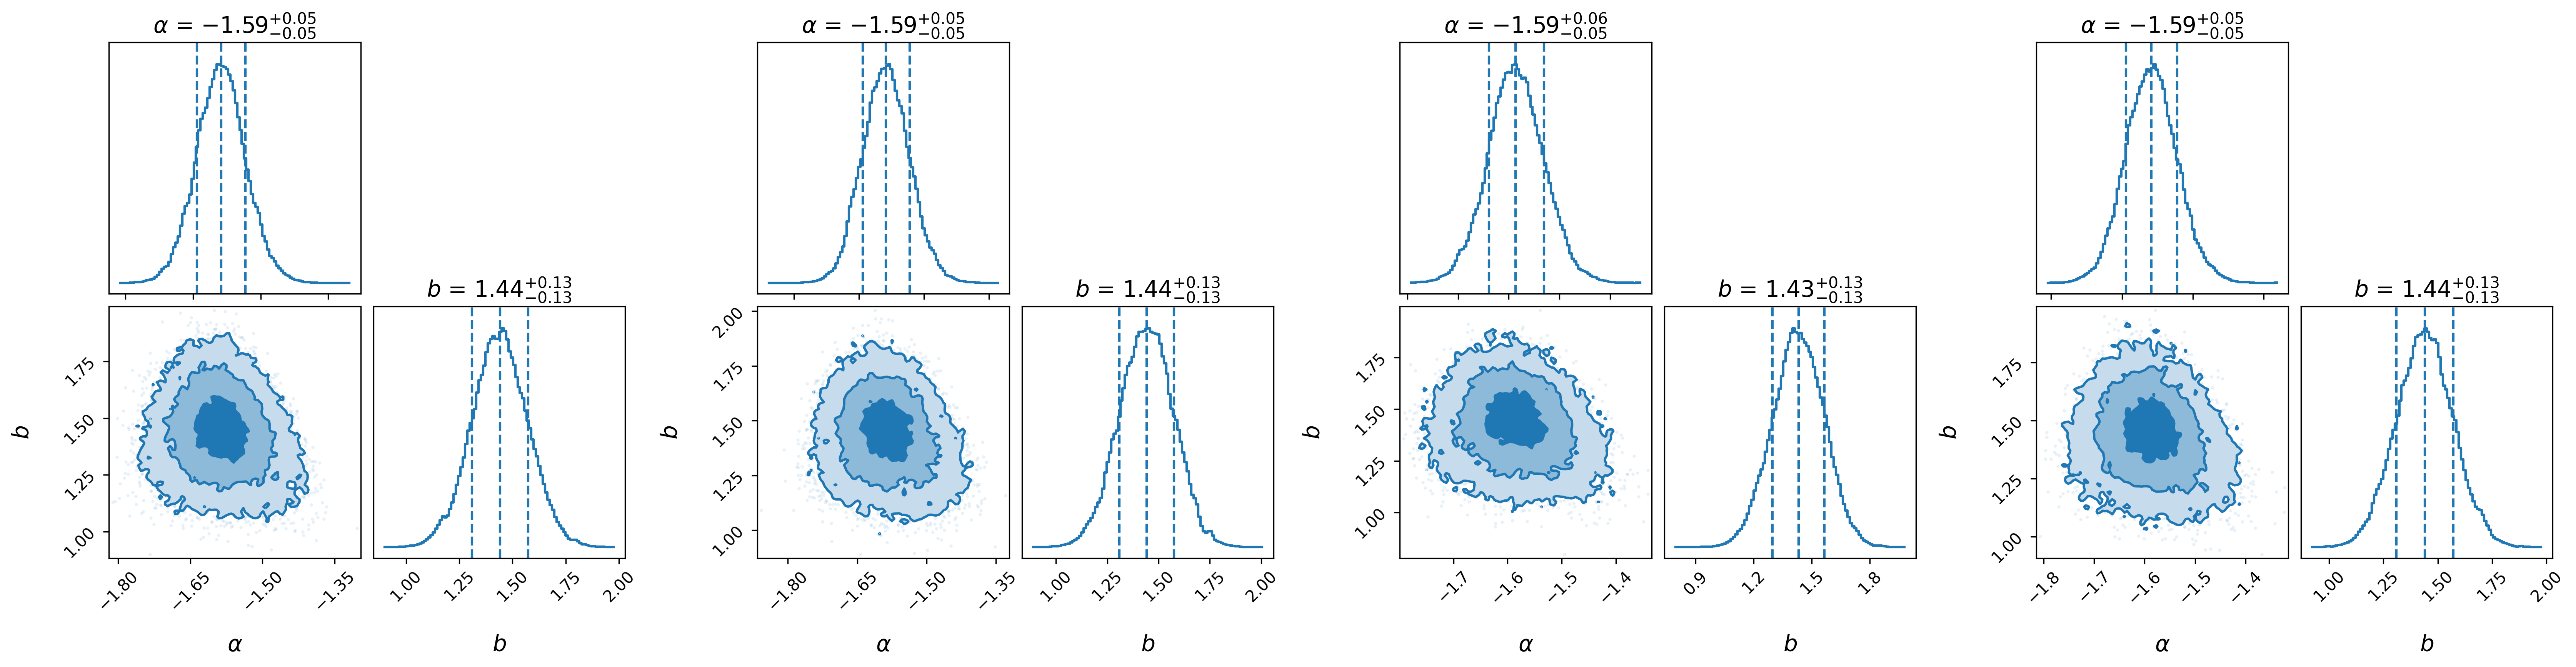

In [6]:
get_plots(list(spl.keys()))